# Netflix Analysis

#### By Mohd Rizwan

### Here I am importing all the necessary python libraries

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("netflix_titles.csv")

In [5]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [6]:
df.shape

(8807, 12)

In [7]:
df.describe(include = 'object')

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df[df['duration'].isnull()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [11]:
df.loc[df['duration'].isnull(), 'duration'] = df.loc[df['duration'].isnull(), 'rating']

In [12]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [13]:
df['rating']

0       PG-13
1       TV-MA
2       TV-MA
3       TV-MA
4       TV-MA
        ...  
8802        R
8803    TV-Y7
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 8807, dtype: object

In [14]:
df['rating'].shape

(8807,)

In [15]:
df.shape

(8807, 12)

In [16]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [17]:
df.loc[(df['rating'] == '74 min') | (df['rating'] == '66 min') | (df['rating'] == '84 min'), 'rating'] = np.nan

In [18]:
df.shape

(8807, 12)

In [19]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

In [20]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [21]:
df['release_year'].unique()

array([2020, 2021, 1993, 2018, 1996, 1998, 1997, 2010, 2013, 2017, 1975,
       1978, 1983, 1987, 2012, 2001, 2014, 2002, 2003, 2004, 2011, 2008,
       2009, 2007, 2005, 2006, 1994, 2015, 2019, 2016, 1982, 1989, 1990,
       1991, 1999, 1986, 1992, 1984, 1980, 1961, 2000, 1995, 1985, 1976,
       1959, 1988, 1981, 1972, 1964, 1945, 1954, 1979, 1958, 1956, 1963,
       1970, 1973, 1925, 1974, 1960, 1966, 1971, 1962, 1969, 1977, 1967,
       1968, 1965, 1946, 1942, 1955, 1944, 1947, 1943], dtype=int64)

In [22]:
df['Date_N'] = pd.to_datetime(df['release_year'], format = '%Y')

In [23]:
df['Date_N'].dt.year.value_counts()

Date_N
2018    1147
2017    1032
2019    1030
2020     953
2016     902
        ... 
1959       1
1925       1
1961       1
1947       1
1966       1
Name: count, Length: 74, dtype: int64

In [24]:
df['Date_N'].unique()

<DatetimeArray>
['2020-01-01 00:00:00', '2021-01-01 00:00:00', '1993-01-01 00:00:00',
 '2018-01-01 00:00:00', '1996-01-01 00:00:00', '1998-01-01 00:00:00',
 '1997-01-01 00:00:00', '2010-01-01 00:00:00', '2013-01-01 00:00:00',
 '2017-01-01 00:00:00', '1975-01-01 00:00:00', '1978-01-01 00:00:00',
 '1983-01-01 00:00:00', '1987-01-01 00:00:00', '2012-01-01 00:00:00',
 '2001-01-01 00:00:00', '2014-01-01 00:00:00', '2002-01-01 00:00:00',
 '2003-01-01 00:00:00', '2004-01-01 00:00:00', '2011-01-01 00:00:00',
 '2008-01-01 00:00:00', '2009-01-01 00:00:00', '2007-01-01 00:00:00',
 '2005-01-01 00:00:00', '2006-01-01 00:00:00', '1994-01-01 00:00:00',
 '2015-01-01 00:00:00', '2019-01-01 00:00:00', '2016-01-01 00:00:00',
 '1982-01-01 00:00:00', '1989-01-01 00:00:00', '1990-01-01 00:00:00',
 '1991-01-01 00:00:00', '1999-01-01 00:00:00', '1986-01-01 00:00:00',
 '1992-01-01 00:00:00', '1984-01-01 00:00:00', '1980-01-01 00:00:00',
 '1961-01-01 00:00:00', '2000-01-01 00:00:00', '1995-01-01 00:00:00',
 '19

In [25]:
df['date_added'] = df['date_added'].str.strip() 

In [26]:
df['Date_Added'] = pd.to_datetime(df['date_added'], format = '%B %d, %Y')

In [27]:
df['Date_Added'].unique()

<DatetimeArray>
['2021-09-25 00:00:00', '2021-09-24 00:00:00', '2021-09-23 00:00:00',
 '2021-09-22 00:00:00', '2021-09-21 00:00:00', '2021-09-20 00:00:00',
 '2021-09-19 00:00:00', '2021-09-17 00:00:00', '2021-09-16 00:00:00',
 '2021-09-15 00:00:00',
 ...
 '2018-09-27 00:00:00', '2017-03-23 00:00:00', '2016-12-25 00:00:00',
 '2016-11-30 00:00:00', '2017-10-23 00:00:00', '2017-11-04 00:00:00',
 '2015-08-05 00:00:00', '2018-12-06 00:00:00', '2016-03-09 00:00:00',
 '2020-01-11 00:00:00']
Length: 1715, dtype: datetime64[ns]

In [28]:
df['type'].count()

8807

In [29]:
MovShows = df.groupby('Date_Added')['type'].value_counts().reset_index()
print(MovShows)

     Date_Added     type  count
0    2008-01-01    Movie      1
1    2008-02-04  TV Show      1
2    2009-05-05    Movie      1
3    2009-11-18    Movie      1
4    2010-11-01    Movie      1
...         ...      ...    ...
2540 2021-09-23    Movie      1
2541 2021-09-23  TV Show      1
2542 2021-09-24  TV Show      7
2543 2021-09-24    Movie      3
2544 2021-09-25    Movie      1

[2545 rows x 3 columns]


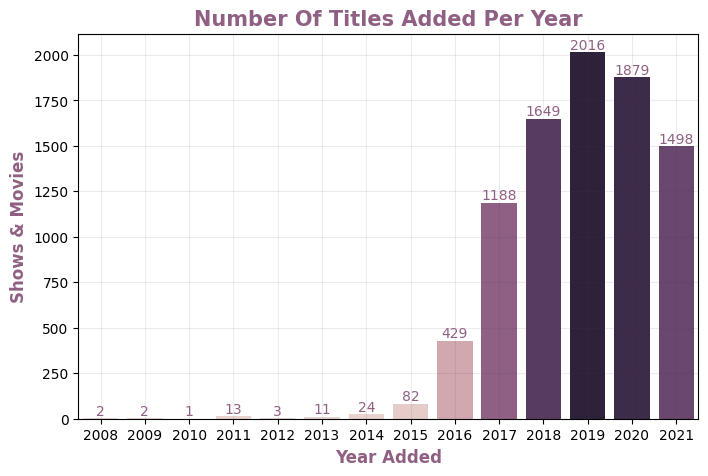

In [30]:
plt.figure(figsize = (8,5))
yr_added = df['Date_Added'].dt.year.value_counts()
ax = sns.barplot( x = yr_added.index, y = yr_added.values, hue = yr_added.values, legend = False)
for container in ax.containers:
    ax.bar_label(container, color = '#8f6083')
plt.xlabel('Year Added', color = '#8f6083', weight = 'bold', fontsize = 12)
plt.ylabel('Shows & Movies', color = '#8f6083', weight = 'bold', fontsize = 12)
plt.title('Number Of Titles Added Per Year', color = '#8f6083', weight = 'bold', fontsize = 15)
plt.xticks( ticks = range(14), labels = np.sort(np.array(yr_added.index, dtype = int)))
plt.grid(True, color = '#573c5f', alpha = 0.1)
plt.show()

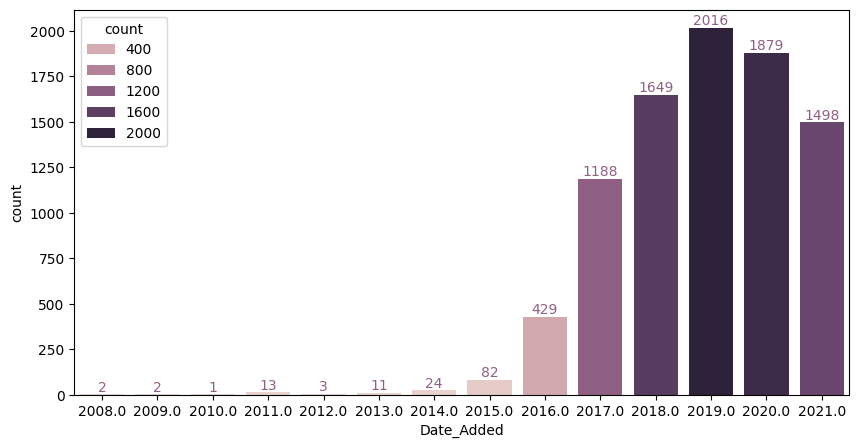

In [31]:
plt.figure(figsize =(10,5))
yr = df['Date_Added'].dt.year.value_counts().reset_index()
ad = sns.barplot(x = yr['Date_Added'] , y = yr['count'], hue = yr['count'])
for container in ad.containers:
    ad.bar_label(container, color = '#8f6083')

plt.show()

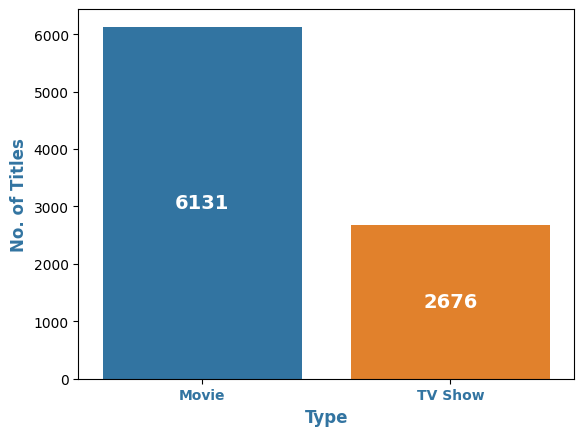

In [32]:
ax = sns.countplot(x = df['type'], hue =  df['type'])
for container in ax.containers:
    ax.bar_label(container, label_type = 'center', color = 'white' , size = 14, weight = 'bold')
plt.ylabel('No. of Titles',color = '#3274a1', weight = 'bold', fontsize = 12 )
plt.xlabel('Type', color = '#3274a1', weight = 'bold', fontsize = 12)
plt.xticks(color = '#3274a1', weight = 'bold', fontsize = 10)

plt.show()

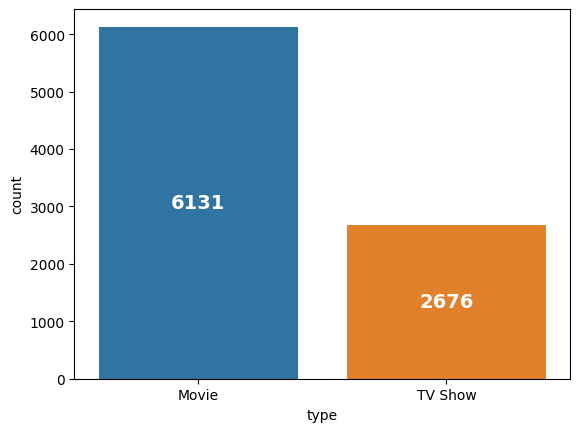

In [33]:
ax = sns.countplot(x = df['type'], hue = df['type'])
for container in ax.containers:
    ax.bar_label(container, label_type = 'center', color = 'white' , size = 14, weight = 'bold')

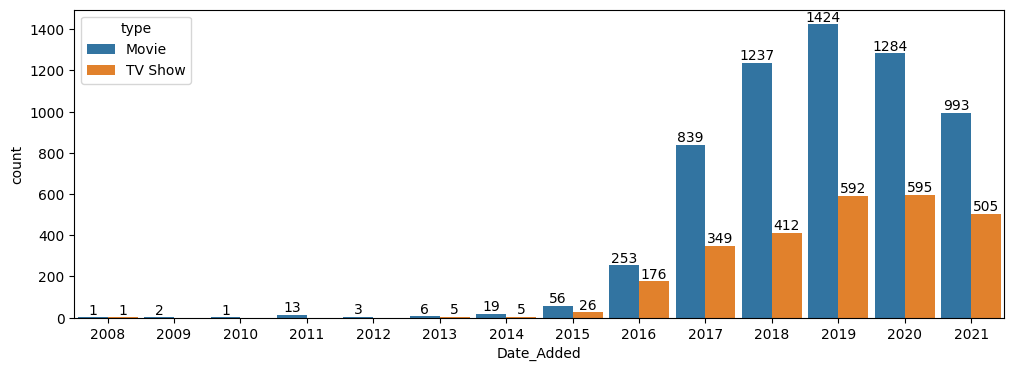

In [34]:
plt.figure(figsize= (12,4))
ay = sns.countplot(x = df['Date_Added'].dt.year, hue = df['type'], width = 0.9)
for container in ay.containers:
    ay.bar_label(container)
plt.xticks(ticks = range(14), labels = np.sort(np.array(yr_added.index, dtype = int)))

plt.show()

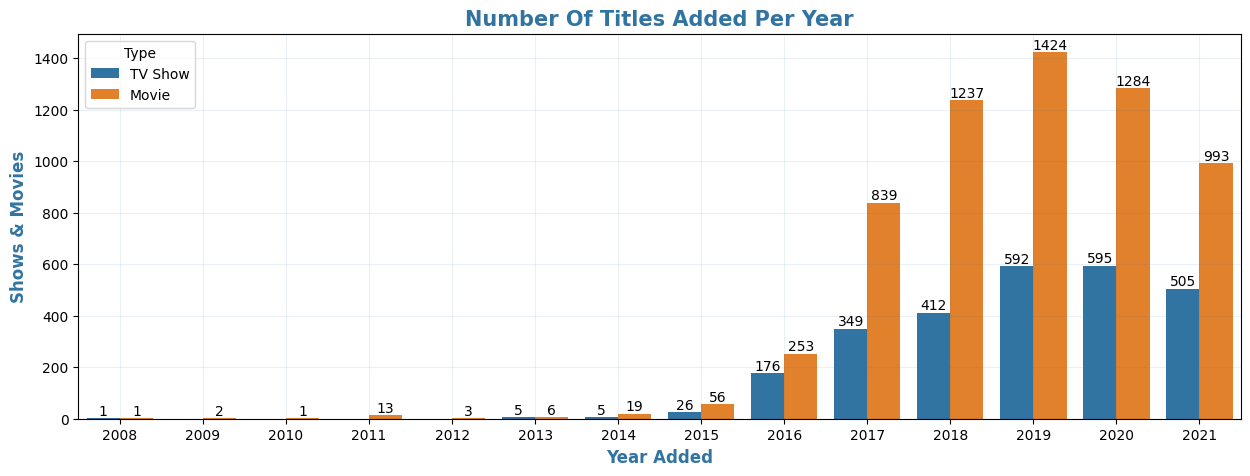

In [35]:
df['Date_Added'] = pd.to_datetime(df['Date_Added'])
df['Year'] = df['Date_Added'].dt.year

MovShows = df.groupby('Year')['type'].value_counts().reset_index(name='count')
MovShows.columns = ['Year','Type', 'Count']

    
plt.figure(figsize=(15,5))
ay = sns.barplot(x='Year', y='Count', hue='Type', data=MovShows)


# Design elements:
for container in ay.containers:
    ay.bar_label(container)
plt.xlabel('Year Added', color = '#3274a1', weight = 'bold', fontsize = 12)
plt.ylabel('Shows & Movies', color = '#3274a1', weight = 'bold', fontsize = 12)
plt.title('Number Of Titles Added Per Year', color = '#3274a1', weight = 'bold', fontsize = 15)
plt.xticks( ticks = range(14), labels = np.sort(np.array(MovShows['Year'].unique(), dtype = int)))
plt.grid(True, color='#3274a1', alpha = 0.1)


plt.show()


### Movies released in 2020

In [36]:
df['type'] = df['type'].str.lower()

In [37]:
Select = int(input('Enter the year that you want to see: '))
Type = input('Enter the type in lower case: ')
data = df[(df['release_year'] == Select) & (df['type'] == Type)]
data.head()

Enter the year that you want to see:  2018
Enter the type in lower case:  tv show


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,Date_Added,Year
21,s22,tv show,Resurrection: Ertugrul,NaN,"Engin Altan Düzyatan, Serdar Gökhan, Hülya Dar...",Turkey,"September 22, 2021",2018,TV-14,5 Seasons,"International TV Shows, TV Action & Adventure,...",When a good deed unwittingly endangers his cla...,2018-01-01,2021-09-22,2021.0
37,s38,tv show,Angry Birds,NaN,"Antti Pääkkönen, Heljä Heikkinen, Lynne Guagli...",Finland,"September 16, 2021",2018,TV-Y7,1 Season,"Kids' TV, TV Comedies","Birds Red, Chuck and their feathered friends h...",2018-01-01,2021-09-16,2021.0
265,s266,tv show,Rascal Does Not Dream of Bunny Girl Senpai,NaN,"Kaito Ishikawa, Asami Seto, Nao Toyama, Atsumi...",Japan,"August 15, 2021",2018,TV-14,1 Season,"Anime Series, International TV Shows, Romantic...","After experiencing ""puberty syndrome"" himself,...",2018-01-01,2021-08-15,2021.0
288,s289,tv show,Las muñecas de la mafia,NaN,"Amparo Grisales, Fernando Solórzano, Angelica ...",Colombia,"August 10, 2021",2018,TV-MA,1 Season,"Crime TV Shows, International TV Shows, Spanis...","Based on the book ""Las Fantásticas,"" this exci...",2018-01-01,2021-08-10,2021.0
513,s514,tv show,Colony,NaN,"Josh Holloway, Sarah Wayne Callies, Peter Jaco...",United States,"July 6, 2021",2018,TV-14,3 Seasons,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",When LA is invaded by outside forces and becom...,2018-01-01,2021-07-06,2021.0


In [38]:
Top_directors = df['director'].value_counts().head(5).reset_index()
Top_directors.columns = ['Directors', 'Titles']
print(Top_directors)

                Directors  Titles
0           Rajiv Chilaka      19
1  Raúl Campos, Jan Suter      18
2            Marcus Raboy      16
3             Suhas Kadav      16
4               Jay Karas      14


### No. of titles done by a particular actor

In [39]:
df[df['cast'] == 'Emma Roberts']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,Date_Added,Year


In [40]:
top = df[df['cast'].str.contains('Robert Downey', case = False, na = False)].count()
print(top)

show_id         7
type            7
title           7
director        7
cast            7
country         7
date_added      7
release_year    7
rating          7
duration        7
listed_in       7
description     7
Date_N          7
Date_Added      7
Year            7
dtype: int64


In [41]:
Actor = input('Enter the name of the Actor/Actress: ')
dd = df[df['cast'].str.contains(Actor, case = False, na = False)].groupby('type')
top = dd['cast'].count()
print(top)

Enter the name of the Actor/Actress:  Tom Holland


type
movie    9
Name: cast, dtype: int64


In [42]:
Actor = input('Enter the name of the Actor/Actress: ')
Grouped = df[df['cast'].str.contains(Actor, case=False, na = False)].groupby('type')
Tops = Grouped['cast'].count()
print(Tops)

Enter the name of the Actor/Actress:  Chris Pratt


type
movie      4
tv show    1
Name: cast, dtype: int64


In [43]:
df['rating'].unique(), df['rating'].nunique()

(array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
        'TV-G', 'G', 'NC-17', nan, 'NR', 'TV-Y7-FV', 'UR'], dtype=object),
 14)

#### Tv 14 rating in canada

In [44]:
df[(df['rating'] == 'TV-14') & (df['country'] == 'Canada')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,Date_Added,Year
157,s158,movie,Level 16,Danishka Esterhazy,"Katie Douglas, Celina Martin, Peter Outerbridg...",Canada,"September 1, 2021",2018,TV-14,102 min,"Sci-Fi & Fantasy, Thrillers",In a bleak academy that teaches girls the virt...,2018-01-01,2021-09-01,2021.0
510,s511,tv show,Between,NaN,"Jennette McCurdy, Jesse Carere, Ryan Allen, Ju...",Canada,"July 6, 2021",2016,TV-14,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",After a mysterious disease kills every residen...,2016-01-01,2021-07-06,2021.0
1279,s1280,movie,Made You Look: A True Story About Fake Art,Barry Avrich,NaN,Canada,"February 23, 2021",2020,TV-14,90 min,"Documentaries, International Movies",A woman walks into a New York gallery with a c...,2020-01-01,2021-02-23,2021.0
1354,s1355,tv show,Heartland,NaN,"Amber Marshall, Michelle Morgan, Graham Wardle...",Canada,"February 1, 2021",2019,TV-14,13 Seasons,TV Dramas,Spunky teenager Amy is reeling from the sudden...,2019-01-01,2021-02-01,2021.0
1383,s1384,tv show,Blown Away,NaN,NaN,Canada,"January 22, 2021",2021,TV-14,2 Seasons,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...,2021-01-01,2021-01-22,2021.0
2106,s2107,tv show,Rust Valley Restorers,NaN,"Mike Hall, Michael Daingerfield",Canada,"August 21, 2020",2020,TV-14,3 Seasons,"International TV Shows, Reality TV","Old-school auto collector Mike Hall, his pal A...",2020-01-01,2020-08-21,2020.0
2552,s2553,tv show,Restaurants on the Edge,NaN,"Nick Liberato, Karin Bohn, Dennis Prescott",Canada,"May 8, 2020",2020,TV-14,2 Seasons,"International TV Shows, Reality TV",Three food and design experts travel the world...,2020-01-01,2020-05-08,2020.0
2769,s2770,movie,There's Something in the Water,"Ellen Page, Ian Daniel",Ellen Page,Canada,"March 27, 2020",2019,TV-14,72 min,"Documentaries, International Movies",This documentary spotlights the struggle of mi...,2019-01-01,2020-03-27,2020.0
3053,s3054,tv show,Border Security: America's Front Line,NaN,NaN,Canada,"January 1, 2020",2018,TV-14,1 Season,"Crime TV Shows, International TV Shows, Realit...",This reality series chronicles the behind-the-...,2018-01-01,2020-01-01,2020.0
3424,s3425,movie,"Martin Matte: La vie, la mort...eh la la..!",Jean-François Blais,Martin Matte,Canada,"October 14, 2019",2019,TV-14,62 min,Stand-Up Comedy,Quebecois comedy star Martin Matte serves up e...,2019-01-01,2019-10-14,2019.0


#### How many movies got the PG-13 rating after 2010

In [45]:
aa = df[(df['rating'] == 'PG-13') & (df['release_year'] > 2008) & (df['type'] == 'movie')]
aa.groupby('type')['title'].count()

type
movie    302
Name: title, dtype: int64

In [46]:
df[['Minutes', 'Unit']] = df['duration'].str.split(" ", expand = True)

In [47]:
df ['Minutes'] = df['Minutes'].astype('int')

In [48]:
df['Minutes'].dtype

dtype('int32')

In [49]:
df.index.nlevels

1

In [50]:
df[df['type'] == 'movie'][['title','duration', 'Minutes']].sort_values(by = 'Minutes', ascending = False).head(5), df[df['type'] == 'movie'][['title','duration', 'Minutes']].sort_values(by = 'Minutes', ascending = True).head()

(                            title duration  Minutes
 4253   Black Mirror: Bandersnatch  312 min      312
 717   Headspace: Unwind Your Mind  273 min      273
 2491       The School of Mischief  253 min      253
 2487               No Longer kids  237 min      237
 2484           Lock Your Girls In  233 min      233,
                                                  title duration  Minutes
 3777                                            Silent    3 min        3
 2713                                       Sol Levante    5 min        5
 1484                                  Cops and Robbers    8 min        8
 1557                                            Canvas    9 min        9
 3535  American Factory: A Conversation with the Obamas   10 min       10)

In [51]:
df[df['type'] == 'tv show'][['title','duration', 'Minutes']].sort_values(by = 'Minutes', ascending = False).head(), df[df['type'] == 'tv show'][['title','duration', 'Minutes']].sort_values(by = 'Minutes', ascending = True).head()

(                       title    duration  Minutes
 548           Grey's Anatomy  17 Seasons       17
 2423            Supernatural  15 Seasons       15
 4798                    NCIS  15 Seasons       15
 1354               Heartland  13 Seasons       13
 4220  COMEDIANS of the world  13 Seasons       13,
                                          title  duration  Minutes
 3695                          Rabbids Invasion  1 Season        1
 3515                        Surviving R. Kelly  1 Season        1
 3510                  When the Camellia Blooms  1 Season        1
 3506                          The Hockey Girls  1 Season        1
 3505  Inside Bill's Brain: Decoding Bill Gates  1 Season        1)

#### Which country has the highest no. of Tv Shows?

In [52]:
ad = df[df['type'] == 'tv show'].groupby('country')
print(ad['country'].count().sort_values(ascending = False).head(3))

country
United States     760
United Kingdom    213
Japan             169
Name: country, dtype: int64


#### Sort data by Year

In [53]:
sort = df.sort_values('Year', ascending = True, inplace = False)
sort.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,Date_N,Date_Added,Year,Minutes,Unit
5957,s5958,movie,To and From New York,Sorin Dan Mihalcescu,"Barbara King, Shaana Diya, John Krisiukenas, Y...",United States,"January 1, 2008",2006,TV-MA,81 min,"Dramas, Independent Movies, Thrillers","While covering a story in New York City, a Sea...",2006-01-01,2008-01-01,2008.0,81,min
6611,s6612,tv show,Dinner for Five,NaN,NaN,United States,"February 4, 2008",2007,TV-MA,1 Season,Stand-Up Comedy & Talk Shows,"In each episode, four celebrities join host Jo...",2007-01-01,2008-02-04,2008.0,1,Season
5956,s5957,movie,Just Another Love Story,Ole Bornedal,"Anders W. Berthelsen, Rebecka Hemse, Nikolaj L...",Denmark,"May 5, 2009",2007,TV-MA,104 min,"Dramas, International Movies",When he causes a car accident that leaves a yo...,2007-01-01,2009-05-05,2009.0,104,min


In [54]:
df['Year'].isnull().sum()

10

In [55]:
df[df['Year'].isnull()]
df.loc[df['Year'].isnull(), 'Year'] = df.loc[df['Year'].isnull(), 'release_year']

In [56]:
df['Year'].isnull().sum()

0